In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [2]:
!dir

 Volume in drive E is SSD volume
 Volume Serial Number is FA50-0540

 Directory of E:\UOM Projects\SensoBot\Webots\16th Feb\controllers\Sensobot_controler1

02/17/2022  03:31 AM    <DIR>          .
02/17/2022  03:31 AM    <DIR>          ..
02/16/2022  09:38 PM    <DIR>          .ipynb_checkpoints
02/16/2022  09:38 PM    <DIR>          .vscode
02/13/2022  05:05 PM           110,488 3.png
02/13/2022  05:06 PM            98,266 4.png
02/13/2022  05:06 PM           148,725 5.png
02/13/2022  05:07 PM           173,909 6.png
02/13/2022  05:08 PM           154,820 7.png
02/13/2022  05:08 PM           230,167 8.png
02/13/2022  05:09 PM           110,085 9.png
02/16/2022  09:38 PM    <DIR>          build
02/12/2022  10:54 AM               749 cam_im.jpg
02/11/2022  06:37 PM             2,957 Makefile
02/14/2022  10:16 PM           145,528 mat.png
02/17/2022  03:32 AM            91,048 mat_new.png
02/17/2022  03:32 AM            15,428 Sensobot_controler1.cpp
02/17/2022  03:31 AM            37,8

In [3]:
f = cv.imread(r'images/eye.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None
t1 = np.linspace(0, 100, 50)
t2 = np.linspace(50, 255, 150)
t3 = np.linspace(255, 255, 56)
transform = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
assert len(transform) == 256
g = cv.LUT(f,transform)
fig, ax = plt.subplots(1,2, figsize=(16, 8))
f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g = cv.cvtColor(g, cv.COLOR_BGR2RGB)
ax[0].imshow(f)
ax[0].set_title('Original Image')
ax[1].imshow(g)
Question 3
ax[1].set_title('Processed Image')
plt.show()

SyntaxError: invalid syntax (2912456293.py, line 15)

In [11]:
image = cv.imread(f"mat_new.png")
image = image[280:, :]

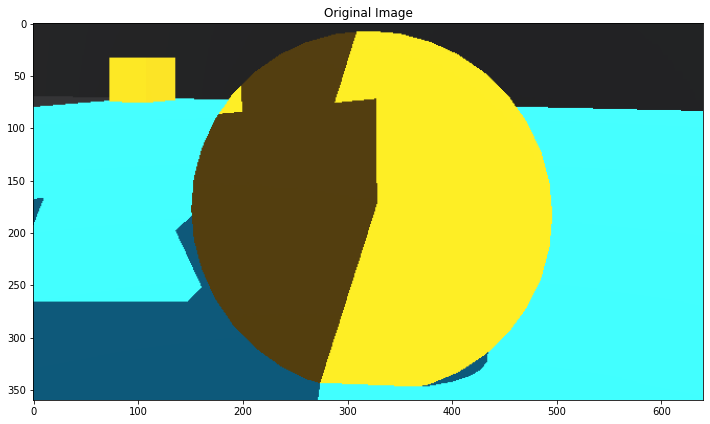

In [12]:
_, ax = plt.subplots(figsize=(12,12))
ax.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax.set_title('Original Image')
plt.show()

In [7]:
a = np.array([[1,2,3],[4,3,2],[5,6,3],[6,5,2]])
a[:2, :] = 0
print(a)

[[0 0 0]
 [0 0 0]
 [5 6 3]
 [6 5 2]]


In [38]:
img_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

## Gen lower mask (0-5) and upper mask (175-180) of RED
mask1 = cv.inRange(img_hsv, (18,100,60), (25,255,120))
mask2 = cv.inRange(img_hsv, (26,50,20), (35,255,255))

mask = cv.bitwise_or(mask1, mask2)

croped = cv.bitwise_and(image, image, mask=mask)

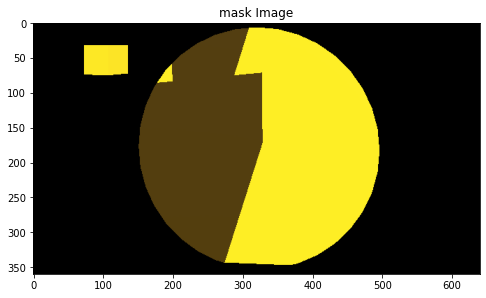

In [39]:
_, ax = plt.subplots(figsize=(8,8))
ax.imshow(cv.cvtColor(croped, cv.COLOR_BGR2RGB))
ax.set_title('mask Image')
plt.show()

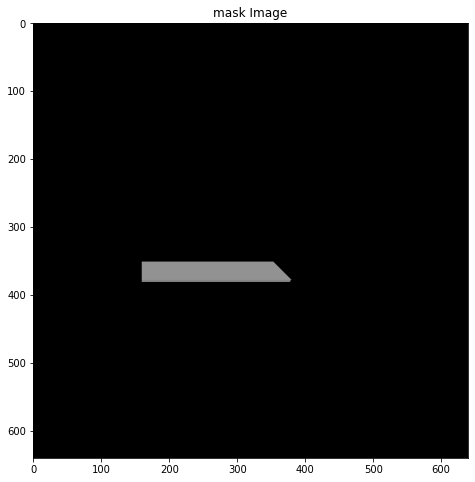

In [9]:
gray = cv.cvtColor(croped, cv.COLOR_BGR2GRAY)
_, ax = plt.subplots(figsize=(8,8))
ax.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))
ax.set_title('mask Image')
plt.show()

In [9]:
# setting threshold of gray image
_, threshold = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
  
# using a findContours() function
contours, _ = cv.findContours(threshold, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

print(len(contours))

2


In [14]:
i = 0
  
# list for storing names of shapes
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
#     if i == 0:
#         i = 1
#         continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv.approxPolyDP(
        contour, 0.01 * cv.arcLength(contour, True), True)
      
    # using drawContours() function
    cv.drawContours(image, [contour], 0, (0, 0, 255), 1)
  
    # finding center point of shape
    M = cv.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
  
    # putting shape name at center of each shape
    if len(approx) == 3:
        cv.putText(image, 'Triangle', (x, y),
                    cv.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
  
    elif len(approx) == 4:
        cv.putText(image, 'Quadrilateral', (x, y),
                    cv.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
  
    elif len(approx) == 5:
        cv.putText(image, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
  
    elif len(approx) == 6:
        cv.putText(image, 'Hexagon', (x, y),
                    cv.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
  
    else:
        cv.putText(image, 'circle', (x, y),
                    cv.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
        
    print("EYYYY")

EYYYY
EYYYY


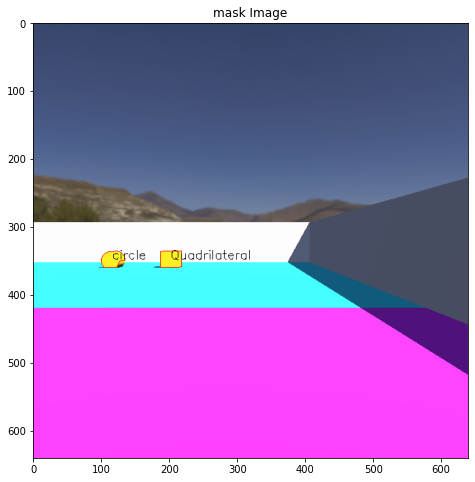

In [15]:
_, ax = plt.subplots(figsize=(8,8))
ax.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax.set_title('mask Image')
plt.show()